#<center> **Conversão de Celsius para Fahrenheit com TensorFlow**

# **Bibliotecas**

In [24]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# **Conectando ao Google Drive**

In [26]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Base de dados**

In [50]:
path = './drive/MyDrive/DataScientist/deep-learning/Celsius-to-Fahrenheit.csv'

In [51]:
temperature_df = pd.read_csv(path)
temperature_df.reset_index(drop= True, inplace= True)

In [52]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


# **Visualização**

In [53]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [54]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [55]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# **Base de Treinamento**

In [57]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

# **Treinamento**

In [58]:
#Rede neural
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1,input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

In [73]:
epochs_hist = model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 336ms/step - loss: 2.2295e-09
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0368
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.4586e-04
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0151
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.9924e-04
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 7.0390e-04
Epoch 13/1000
1/1 [===========

In [74]:
epochs_hist.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'Training loss')

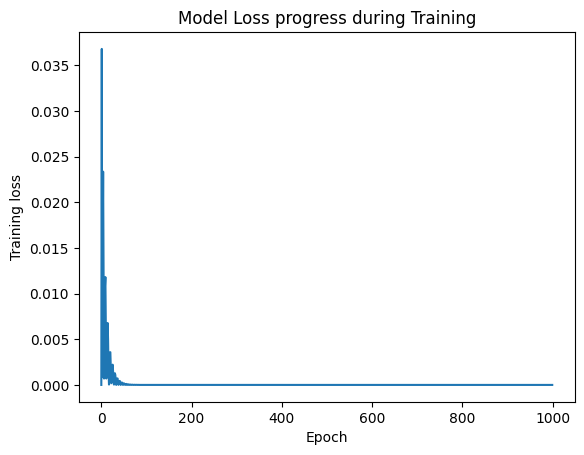

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')

In [76]:
#Valores da formula de transformação de C para F
#T(F) = T(C) * 9/5 + 32
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

## **Testes**

In [77]:
#Pela IA
temp_c = 0
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 90ms/step


array([[32.]], dtype=float32)

In [80]:
#Formula
temp_c =0
temp_f1 = 9/5*temp_c + 32
temp_f1

32.0

In [79]:
#IA
temp_c = 25
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 39ms/step


array([[77.]], dtype=float32)

In [81]:
#Fórmula
temp_c = 25
temp_f1 = 9/5*temp_c + 32
temp_f1

77.0